<a href="https://colab.research.google.com/github/mdssumin/SmartFactory_with_MDSTech_2nd/blob/main/Personal_Project/Younggyu_Kim/Yolov5(xy_coord).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#좌표 레이블을 위한 detect.py 수정사항  
163번줄 "if save_img or save_crop or view_img: "의 아래 부분에

xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()    
({xywh[0]:.2f}, {xywh[1]:.2f}) 추가

#기본 세팅

In [ ]:
from glob import glob
import yaml
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show_detection(path):
  image = cv2.imread(path)
  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  # cv2에서는 rgb 반전되어서 다시 돌려주어야 함
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#Yolov5 불러오기

In [ ]:
#yolov5 clone
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15814 (delta 9), reused 27 (delta 9), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 28.50 MiB/s, done.
Resolving deltas: 100% (10821/10821), done.


In [ ]:
#install yolov5
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


#detect.py수정  

In [ ]:
%cd /content/yolov5/
!python detect.py --source /content/drive/MyDrive/drivedataset/wheelchair/wheelchair_ex2.jpg --save-txt

/content/yolov5
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=yolov5s.pt, source=/content/drive/MyDrive/drivedataset/wheelchair/wheelchair_ex2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=Fa

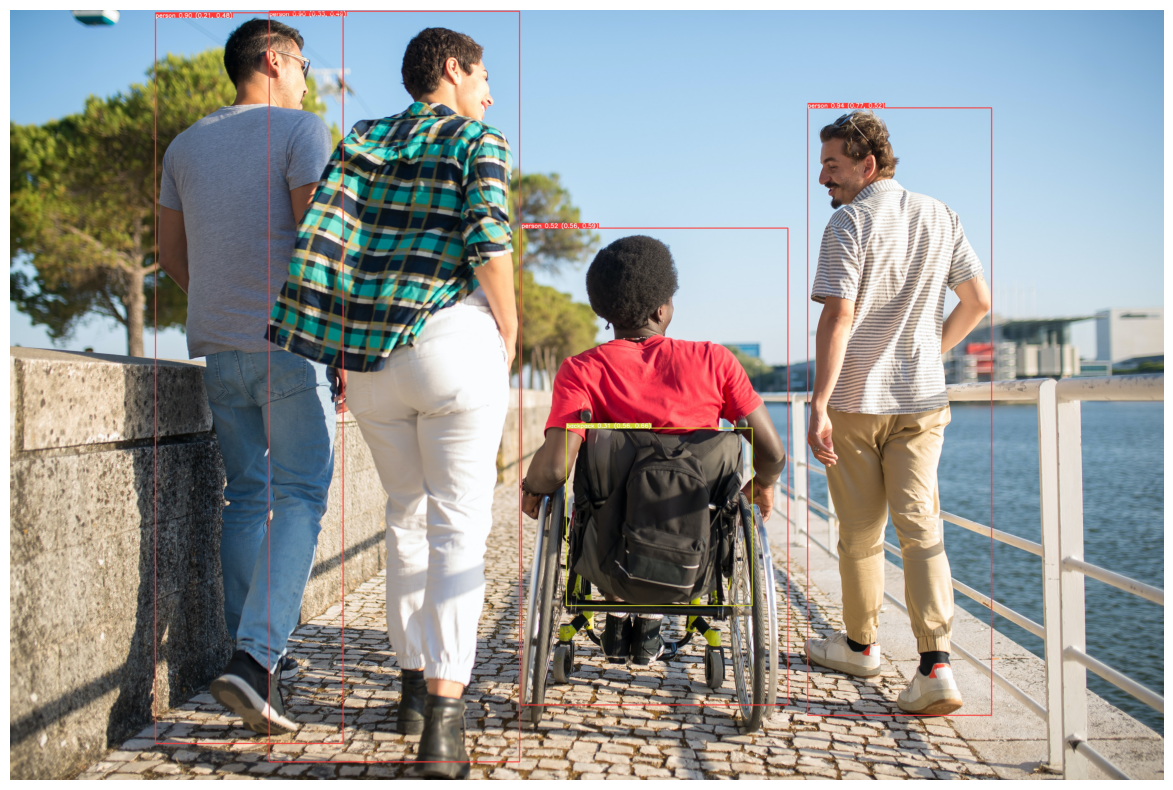

In [ ]:
show_detection()